In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('../data/borg_traces_data.csv')

In [3]:
df.head()

,Unnamed: 0,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,...,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cpu_usage_distribution,tail_cpu_usage_distribution,cluster,event,failed
0,0,0,2,94591244395,3,1,200,0,144,168846390496,...,0.014435,0.000415,NaN,NaN,1.0,[0.00314331 0.00381088 0.00401306 0.00415039 0...,[0.00535583 0.00541687 0.00548553 0.00554657 0...,7,FAIL,1
1,1,2517305308183,2,260697606809,2,0,360,221495397286,335,85515092,...,0.000000,0.000000,NaN,NaN,1.0,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,7,FAIL,1
2,2,195684022913,6,276227177776,2,0,103,0,376,169321752432,...,0.010422,0.000235,0.939919,0.001318,1.0,[0.01344299 0.01809692 0.0201416 0.02246094 0...,[0.02902222 0.02929688 0.0295105 0.0296936 0...,7,SCHEDULE,0
3,3,0,2,10507389885,3,0,200,0,1977,178294817221,...,0.041626,0.000225,1.359102,0.007643,1.0,[0.03704834 0.04125977 0.04290771 0.04425049 0...,[0.05535889 0.05584717 0.05633545 0.05718994 0...,8,FAIL,1
4,4,1810627494172,3,25911621841,2,0,0,0,3907,231364893292,...,0.000272,0.000010,NaN,NaN,1.0,[0. 0. 0. 0. 0...,[0.00041485 0.00041485 0.00041485 0.00041485 0...,2,FINISH,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405894 entries, 0 to 405893
Data columns (total 34 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       405894 non-null  int64  
 1   time                             405894 non-null  int64  
 2   instance_events_type             405894 non-null  int64  
 3   collection_id                    405894 non-null  int64  
 4   scheduling_class                 405894 non-null  int64  
 5   collection_type                  405894 non-null  int64  
 6   priority                         405894 non-null  int64  
 7   alloc_collection_id              405894 non-null  int64  
 8   instance_index                   405894 non-null  int64  
 9   machine_id                       405894 non-null  int64  
 10  resource_request                 405120 non-null  object 
 11  constraint                       405894 non-null  object 
 12  co

<Axes: >

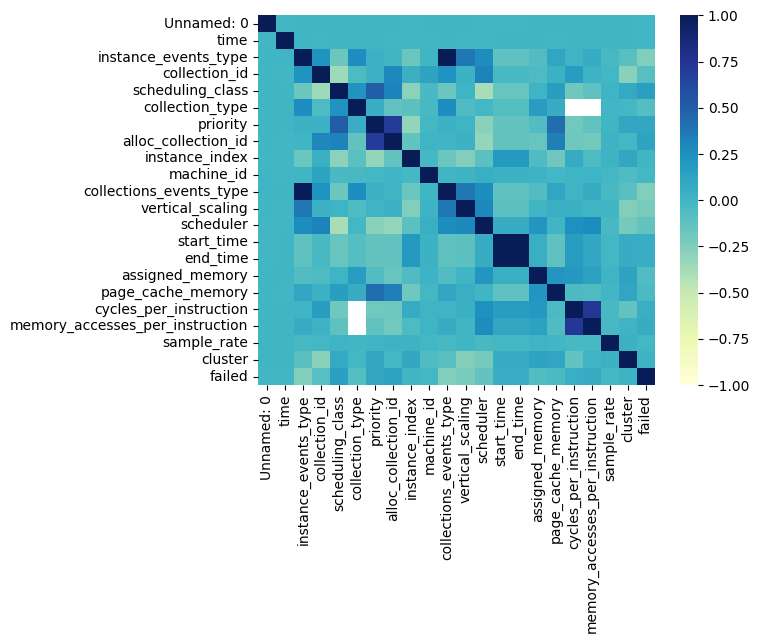

In [5]:
sns.heatmap(df.corr(numeric_only=True), cmap='YlGnBu', vmin=-1, vmax=1)

In [6]:
pd.set_option('display.max_colwidth', None)
print(df['resource_request'].head())

0           {'cpus': 0.020660400390625, 'memory': 0.014434814453125}
1     {'cpus': 0.00724029541015625, 'memory': 0.0013027191162109375}
2             {'cpus': 0.048583984375, 'memory': 0.0041656494140625}
3               {'cpus': 0.0704345703125, 'memory': 0.0416259765625}
4    {'cpus': 0.00244903564453125, 'memory': 0.00023174285888671875}
Name: resource_request, dtype: object


In [7]:
df = df[['time', 'instance_events_type', 'scheduling_class', 'priority', 'resource_request', 'collections_events_type', 'scheduler', 'event', 'failed']]

In [8]:
df.head()

,time,instance_events_type,scheduling_class,priority,resource_request,collections_events_type,scheduler,event,failed
0,0,2,3,200,"{'cpus': 0.020660400390625, 'memory': 0.014434814453125}",2,0.0,FAIL,1
1,2517305308183,2,2,360,"{'cpus': 0.00724029541015625, 'memory': 0.0013027191162109375}",2,0.0,FAIL,1
2,195684022913,6,2,103,"{'cpus': 0.048583984375, 'memory': 0.0041656494140625}",6,1.0,SCHEDULE,0
3,0,2,3,200,"{'cpus': 0.0704345703125, 'memory': 0.0416259765625}",2,0.0,FAIL,1
4,1810627494172,3,2,0,"{'cpus': 0.00244903564453125, 'memory': 0.00023174285888671875}",3,0.0,FINISH,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405894 entries, 0 to 405893
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   time                     405894 non-null  int64  
 1   instance_events_type     405894 non-null  int64  
 2   scheduling_class         405894 non-null  int64  
 3   priority                 405894 non-null  int64  
 4   resource_request         405120 non-null  object 
 5   collections_events_type  405894 non-null  int64  
 6   scheduler                404935 non-null  float64
 7   event                    405894 non-null  object 
 8   failed                   405894 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 27.9+ MB


In [10]:
df = df.dropna() 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404161 entries, 0 to 405893
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   time                     404161 non-null  int64  
 1   instance_events_type     404161 non-null  int64  
 2   scheduling_class         404161 non-null  int64  
 3   priority                 404161 non-null  int64  
 4   resource_request         404161 non-null  object 
 5   collections_events_type  404161 non-null  int64  
 6   scheduler                404161 non-null  float64
 7   event                    404161 non-null  object 
 8   failed                   404161 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 30.8+ MB


In [12]:
df.head()

,time,instance_events_type,scheduling_class,priority,resource_request,collections_events_type,scheduler,event,failed
0,0,2,3,200,"{'cpus': 0.020660400390625, 'memory': 0.014434814453125}",2,0.0,FAIL,1
1,2517305308183,2,2,360,"{'cpus': 0.00724029541015625, 'memory': 0.0013027191162109375}",2,0.0,FAIL,1
2,195684022913,6,2,103,"{'cpus': 0.048583984375, 'memory': 0.0041656494140625}",6,1.0,SCHEDULE,0
3,0,2,3,200,"{'cpus': 0.0704345703125, 'memory': 0.0416259765625}",2,0.0,FAIL,1
4,1810627494172,3,2,0,"{'cpus': 0.00244903564453125, 'memory': 0.00023174285888671875}",3,0.0,FINISH,0


In [13]:
(df['time'] == 0).mean()
df = df[df['time'] != 0]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348530 entries, 1 to 405893
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   time                     348530 non-null  int64  
 1   instance_events_type     348530 non-null  int64  
 2   scheduling_class         348530 non-null  int64  
 3   priority                 348530 non-null  int64  
 4   resource_request         348530 non-null  object 
 5   collections_events_type  348530 non-null  int64  
 6   scheduler                348530 non-null  float64
 7   event                    348530 non-null  object 
 8   failed                   348530 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 26.6+ MB


In [15]:
df.head(10)

,time,instance_events_type,scheduling_class,priority,resource_request,collections_events_type,scheduler,event,failed
1,2517305308183,2,2,360,"{'cpus': 0.00724029541015625, 'memory': 0.0013027191162109375}",2,0.0,FAIL,1
2,195684022913,6,2,103,"{'cpus': 0.048583984375, 'memory': 0.0041656494140625}",6,1.0,SCHEDULE,0
4,1810627494172,3,2,0,"{'cpus': 0.00244903564453125, 'memory': 0.00023174285888671875}",3,0.0,FINISH,0
5,1626744497194,6,0,103,"{'cpus': 0.0615234375, 'memory': 0.00540924072265625}",6,1.0,SCHEDULE,0
6,130721370174,0,1,117,"{'cpus': 0.00566864013671875, 'memory': 0.0015621185302734375}",0,0.0,ENABLE,0
7,2373350421416,3,2,103,"{'cpus': 0.022003173828125, 'memory': 0.0015010833740234375}",3,1.0,FINISH,0
8,1970214287222,0,0,0,"{'cpus': 0.0081024169921875, 'memory': 0.003612518310546875}",0,0.0,ENABLE,0
9,2212203898561,6,0,103,"{'cpus': 0.09716796875, 'memory': 0.00676727294921875}",6,1.0,SCHEDULE,0
10,36255576255,6,0,116,"{'cpus': 0.01629638671875, 'memory': 0.0048370361328125}",6,1.0,SCHEDULE,0
11,723622816016,1,1,103,"{'cpus': 0.04119873046875, 'memory': 0.0104217529296875}",1,1.0,EVICT,0


In [16]:
df['event'].value_counts()

event
FINISH            91727
SCHEDULE          68950
LOST              59515
ENABLE            57174
FAIL              55341
EVICT             14756
KILL                951
UPDATE_PENDING      111
QUEUE                 4
UPDATE_RUNNING        1
Name: count, dtype: int64

In [17]:
events_keep = ['EVICT', 'FAIL', 'FINISH', 'LOST', 'KILL']

df = df[df['event'].isin(events_keep)]

In [18]:
df['event'].value_counts()
df = df.reset_index(drop=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222290 entries, 0 to 222289
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   time                     222290 non-null  int64  
 1   instance_events_type     222290 non-null  int64  
 2   scheduling_class         222290 non-null  int64  
 3   priority                 222290 non-null  int64  
 4   resource_request         222290 non-null  object 
 5   collections_events_type  222290 non-null  int64  
 6   scheduler                222290 non-null  float64
 7   event                    222290 non-null  object 
 8   failed                   222290 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 15.3+ MB


In [20]:
def extract_values(s):
    if not s:
        return 0, 0
    # Remove braces and spaces
    s = s.strip('{} ')
    # Split by comma
    parts = s.split(',')
    # Extract cpus
    cpus = float(parts[0].split(':')[1].strip())
    # Extract memory
    memory = float(parts[1].split(':')[1].strip())
    return cpus, memory

# Apply to the dataframe
df['cpu_request'], df['memory_request'] = zip(*df['resource_request'].apply(extract_values))
df.drop('resource_request', axis=1, inplace=True)

In [21]:
df.head()

,time,instance_events_type,scheduling_class,priority,collections_events_type,scheduler,event,failed,cpu_request,memory_request
0,2517305308183,2,2,360,2,0.0,FAIL,1,0.007240,0.001303
1,1810627494172,3,2,0,3,0.0,FINISH,0,0.002449,0.000232
2,2373350421416,3,2,103,3,1.0,FINISH,0,0.022003,0.001501
3,723622816016,1,1,103,1,1.0,EVICT,0,0.041199,0.010422
4,204389347359,3,2,0,3,0.0,FINISH,0,0.002518,0.000221


In [22]:
df['failed'] = df['event'].apply(lambda x: 0 if x == 'FINISH' else 1)
df.drop('event', axis=1, inplace=True)
df['failed'].value_counts()

failed
1    130563
0     91727
Name: count, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222290 entries, 0 to 222289
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   time                     222290 non-null  int64  
 1   instance_events_type     222290 non-null  int64  
 2   scheduling_class         222290 non-null  int64  
 3   priority                 222290 non-null  int64  
 4   collections_events_type  222290 non-null  int64  
 5   scheduler                222290 non-null  float64
 6   failed                   222290 non-null  int64  
 7   cpu_request              222290 non-null  float64
 8   memory_request           222290 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 15.3 MB


In [24]:
df.head()

,time,instance_events_type,scheduling_class,priority,collections_events_type,scheduler,failed,cpu_request,memory_request
0,2517305308183,2,2,360,2,0.0,1,0.007240,0.001303
1,1810627494172,3,2,0,3,0.0,0,0.002449,0.000232
2,2373350421416,3,2,103,3,1.0,0,0.022003,0.001501
3,723622816016,1,1,103,1,1.0,1,0.041199,0.010422
4,204389347359,3,2,0,3,0.0,0,0.002518,0.000221


In [25]:
df['failed'].value_counts()

failed
1    130563
0     91727
Name: count, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222290 entries, 0 to 222289
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   time                     222290 non-null  int64  
 1   instance_events_type     222290 non-null  int64  
 2   scheduling_class         222290 non-null  int64  
 3   priority                 222290 non-null  int64  
 4   collections_events_type  222290 non-null  int64  
 5   scheduler                222290 non-null  float64
 6   failed                   222290 non-null  int64  
 7   cpu_request              222290 non-null  float64
 8   memory_request           222290 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 15.3 MB


In [27]:
df = df.drop_duplicates()

In [ ]:
df.to_csv("../data/processed_gct.csv", index=False)

In [29]:
y = df.iloc[:, 6]
X = df[['cpu_request', 'memory_request', 'priority', 'scheduling_class']]
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207762 entries, 0 to 222289
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cpu_request       207762 non-null  float64
 1   memory_request    207762 non-null  float64
 2   priority          207762 non-null  int64  
 3   scheduling_class  207762 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 7.9 MB


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify=y)

In [31]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the base model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],         # number of trees
    "max_depth": [None, 10, 20, 30],         # tree depth
    "min_samples_split": [2, 5, 10],         # minimum samples to split a node
    "min_samples_leaf": [1, 2, 4],           # minimum samples at a leaf  # number of features to consider
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,                # 3-fold cross validation
    n_jobs=-1,           # use all available cores
    verbose=2,           # print progress
    scoring="f1"         # you can also use "accuracy", "recall", etc.
)

# Fit
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Predict using the best model
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Confusion Matrix:
[[26239  1274]
 [ 3143 31673]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     27513
           1       0.96      0.91      0.93     34816

    accuracy                           0.93     62329
   macro avg       0.93      0.93      0.93     62329
weighted avg       0.93      0.93      0.93     62329



In [ ]:
import joblib

joblib.dump(best_rf, "../models/failure_model.pkl")

['failure_model.pkl']